# Importation des librairies

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import yaml
import warnings

warnings.filterwarnings("ignore")

### Lecture des données

In [2]:
file = open('../../conf/global_conf.yml', 'r') 
conf = yaml.safe_load(file)

# Définition d'une fonction pointant vers le répertoire des données
def datapath(fich):
    return conf['data_path'] + fich

print(datapath("users.cvs"))

../../data/users.cvs


In [3]:
list_na_values = ['#ERREUR', '(1)']

In [4]:
usagers_2005 = pd.read_csv(datapath('usagers_2005.csv'), na_values = list_na_values)
usagers_2006 = pd.read_csv(datapath('usagers_2006.csv'), na_values = list_na_values)
usagers_2007 = pd.read_csv(datapath('usagers_2007.csv'), na_values = list_na_values)
usagers_2008 = pd.read_csv(datapath('usagers_2008.csv'), na_values = list_na_values)
usagers_2009 = pd.read_csv(datapath('usagers_2009.csv'), na_values = list_na_values)
usagers_2010 = pd.read_csv(datapath('usagers_2010.csv'), na_values = list_na_values)
usagers_2011 = pd.read_csv(datapath('usagers_2011.csv'), na_values = list_na_values)
usagers_2012 = pd.read_csv(datapath('usagers_2012.csv'), na_values = list_na_values)
usagers_2013 = pd.read_csv(datapath('usagers_2013.csv'), na_values = list_na_values)
usagers_2014 = pd.read_csv(datapath('usagers_2014.csv'), na_values = list_na_values)
usagers_2015 = pd.read_csv(datapath('usagers_2015.csv'), na_values = list_na_values)
usagers_2016 = pd.read_csv(datapath('usagers_2016.csv'), na_values = list_na_values)
usagers_2017 = pd.read_csv(datapath('usagers-2017.csv'), na_values = list_na_values)
usagers_2018 = pd.read_csv(datapath('usagers-2018.csv'), na_values = list_na_values)

#Changement de separateur à partir de 2019 + ajout de la colonne id_vehicule et transformatin de secu en secu1, secu2, secu3
usagers_2019 = pd.read_csv(datapath('usagers-2019.csv'), sep = ';', na_values = list_na_values)
usagers_2020 = pd.read_csv(datapath('usagers-2020.csv'), sep = ';', na_values = list_na_values)

#Ajout de la case id_usager
usagers_2021 = pd.read_csv(datapath('usagers-2021.csv'), sep = ';', na_values = list_na_values)
usagers_2022 = pd.read_csv(datapath('usagers-2022.csv'), sep = ';', na_values = list_na_values)
usagers_2006.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 187085 entries, 0 to 187084
Data columns (total 12 columns):
 #   Column   Non-Null Count   Dtype  
---  ------   --------------   -----  
 0   Num_Acc  187085 non-null  int64  
 1   place    187085 non-null  int64  
 2   catu     187085 non-null  int64  
 3   grav     187085 non-null  int64  
 4   sexe     187085 non-null  int64  
 5   trajet   187085 non-null  int64  
 6   secu     187084 non-null  float64
 7   locp     187085 non-null  int64  
 8   actp     187085 non-null  int64  
 9   etatp    187085 non-null  int64  
 10  an_nais  186038 non-null  float64
 11  num_veh  187085 non-null  object 
dtypes: float64(2), int64(9), object(1)
memory usage: 17.1+ MB


In [5]:
### Création d'un dataframe df reprenant tous les années

In [6]:
liste = [usagers_2005, usagers_2006, usagers_2007, usagers_2008, usagers_2009, usagers_2010, usagers_2011,usagers_2012, usagers_2013, usagers_2014, usagers_2015, usagers_2016,
                usagers_2017, usagers_2018, usagers_2019, usagers_2020, usagers_2021, usagers_2022]

ans = [2005, 2006, 2007, 2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017, 2018, 2019, 2020, 2021, 2022]

for usager_an, an in zip(liste, ans) :
    usager_an['an'] = an


In [7]:
df = pd.concat([usagers_2005, usagers_2006, usagers_2007, usagers_2008, usagers_2009, usagers_2010, usagers_2011,usagers_2012, usagers_2013, usagers_2014, usagers_2015, usagers_2016,
                usagers_2017, usagers_2018, usagers_2019, usagers_2020, usagers_2021, usagers_2022])
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2636377 entries, 0 to 126661
Data columns (total 18 columns):
 #   Column       Dtype  
---  ------       -----  
 0   Num_Acc      int64  
 1   place        float64
 2   catu         int64  
 3   grav         int64  
 4   sexe         int64  
 5   trajet       float64
 6   secu         float64
 7   locp         float64
 8   actp         object 
 9   etatp        float64
 10  an_nais      float64
 11  num_veh      object 
 12  an           int64  
 13  id_vehicule  object 
 14  secu1        float64
 15  secu2        float64
 16  secu3        float64
 17  id_usager    object 
dtypes: float64(9), int64(5), object(4)
memory usage: 382.2+ MB


Remplacement des -1 par des NaN

In [8]:
df['grav'].unique()

array([ 4,  3,  1,  2, -1])

In [9]:
df = df.replace(-1, np.nan)
df['grav'].unique()

array([ 4.,  3.,  1.,  2., nan])

Suppression des lignes de NaN de la variable 'grav'

In [10]:
df = df.dropna(subset = 'grav', axis = 0)
df['grav'].unique()

array([4., 3., 1., 2.])

# Visualisation du nombre d'accidents par année

In [11]:
df_numacc = df[['Num_Acc', 'an']]
df_numacc.drop_duplicates()
df_numacc['Nombre_accident'] = 1
df_numacc = df_numacc[['an', 'Nombre_accident']].groupby('an').sum()
 

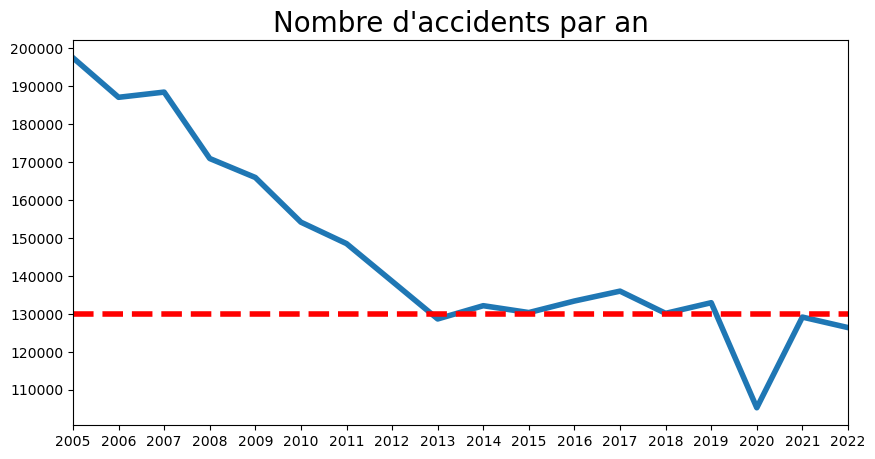

In [12]:
plt.figure(figsize=(10, 5))
plt.plot(df_numacc.index, df_numacc.values, linewidth = 4)
plt.xticks(ticks = np.arange(2005, 2023, 1),  labels = [2005, 2006, 2007, 2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017, 2018, 2019, 2020, 2021, 2022])
plt.yticks(ticks = np.arange(110000, 210000, 10000),  labels = [110000, 120000, 130000, 140000, 150000, 160000, 170000, 180000, 190000, 200000])
plt.plot([2005, 2022], [130000, 130000], 'r--', linewidth = 4)
plt.title("Nombre d'accidents par an", fontsize = 20)
plt.xlim(2005, 2022)
plt.show()

# Visualisation du nombre de tués par an

In [13]:
df_tue = df[['grav', 'an']][df['grav'] == 2]
df_tue = df_tue[['grav', 'an']].groupby('an').count()
df_tue

,grav
an,
2005,5543
2006,4942
2007,4838
2008,4443
2009,4443
2010,4172
2011,4111
2012,3842
2013,3427


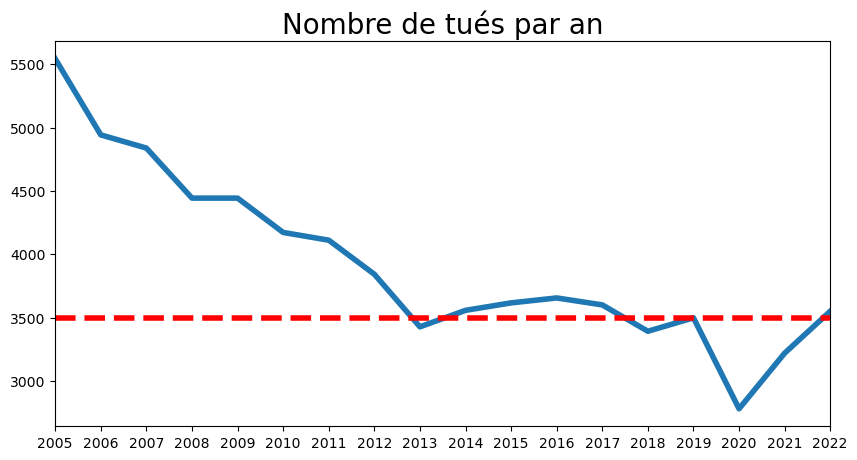

In [14]:
plt.figure(figsize=(10, 5))
plt.plot(df_tue.index, df_tue.values, linewidth = 4)
plt.xticks(ticks = np.arange(2005, 2023, 1),  labels = [2005, 2006, 2007, 2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017, 2018, 2019, 2020, 2021, 2022])
#plt.yticks(ticks = np.arange(110000, 210000, 10000),  labels = [110000, 120000, 130000, 140000, 150000, 160000, 170000, 180000, 190000, 200000])
plt.plot([2005, 2022], [3500, 3500], 'r--', linewidth = 4)
plt.title("Nombre de tués par an", fontsize = 20)
plt.xlim(2005, 2022)
plt.show()

# Visualisation du nombre d'accidents entre 2019 et 2022 par an

In [15]:
df_numacc_2019_2022 = df[['Num_Acc', 'an']][df['an'] >= 2019]
df_numacc_2019_2022.drop_duplicates()
df_numacc_2019_2022['Nombre_accident'] = 1
df_numacc_2019_2022 = df_numacc_2019_2022[['an', 'Nombre_accident']].groupby('an').sum()
df_numacc_2019_2022 = df_numacc_2019_2022.reset_index()
df_numacc_2019_2022

,an,Nombre_accident
0,2019,132977
1,2020,105295
2,2021,129188
3,2022,126421


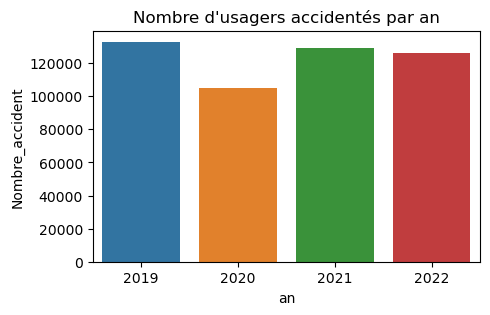

In [16]:
plt.figure(figsize=(5,3))
sns.barplot(data = df_numacc_2019_2022, x = 'an', y = 'Nombre_accident')
plt.title("Nombre d'usagers accidentés par an")
plt.show()

# Visualisation du la proportion de chaque modalité de la gravité pas an

In [17]:
df_grav_2019_2022 = df[['grav', 'an']][df['an'] >= 2019]
df_grav_2019_2022 = pd.crosstab(df_grav_2019_2022['grav'], df_grav_2019_2022['an'], normalize = 'columns') * 100
df_grav_2019_2022

an,2019,2020,2021,2022
grav,,,,
1.0,41.596667,41.091220,42.684305,42.421750
2.0,2.630530,2.640201,2.491717,2.808078
3.0,15.685419,15.931431,14.779236,15.234811
4.0,40.087384,40.337148,40.044741,39.535362


In [18]:
df_grav_2019_2022 = pd.DataFrame(data = df_grav_2019_2022.values, columns = ['2019', '2020', '2021', '2022'])
display(df_grav_2019_2022)


,2019,2020,2021,2022
0,41.596667,41.091220,42.684305,42.421750
1,2.630530,2.640201,2.491717,2.808078
2,15.685419,15.931431,14.779236,15.234811
3,40.087384,40.337148,40.044741,39.535362


In [19]:
df_grav_2019_2022.insert(loc = 0, column = 'gravité', value = ['Indemnes',  'Tués', 'Blessés hospitalisés', 'Blessés légers'])
display(df_grav_2019_2022)

,gravité,2019,2020,2021,2022
0,Indemnes,41.596667,41.091220,42.684305,42.421750
1,Tués,2.630530,2.640201,2.491717,2.808078
2,Blessés hospitalisés,15.685419,15.931431,14.779236,15.234811
3,Blessés légers,40.087384,40.337148,40.044741,39.535362


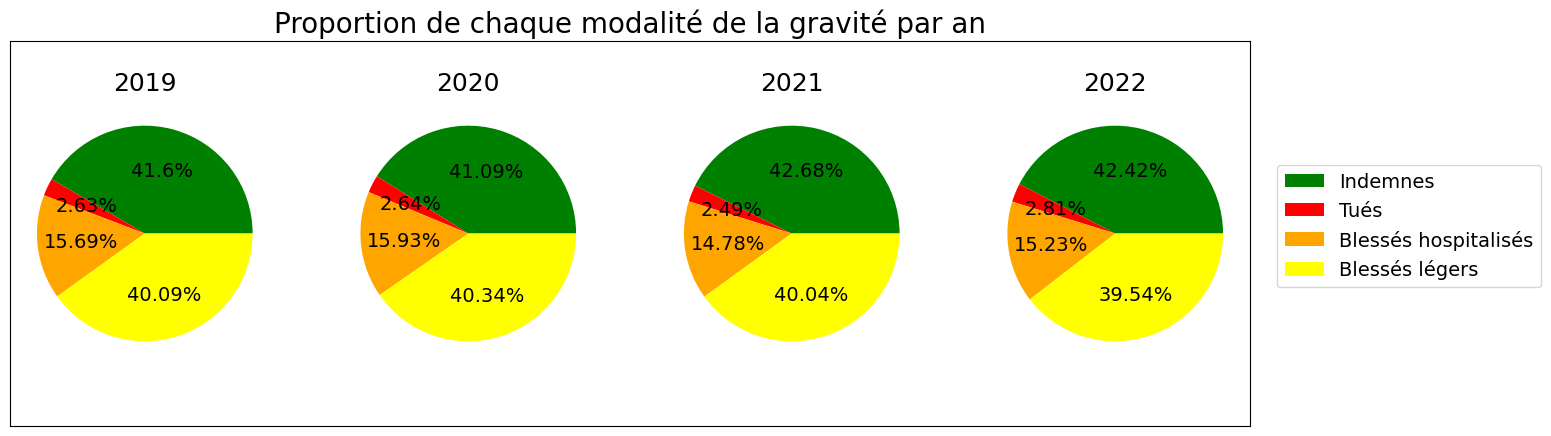

In [22]:
plt.figure(figsize = (16, 5))
#df_grav_2019_2022.plot(kind = 'pie', subplots = True, figsize = (10, 10), legend = None)
plt.title('Proportion de chaque modalité de la gravité par an', fontsize = 20)
plt.xticks([])
plt.yticks([])

plt.subplot(1, 4, 1)
plt.pie(df_grav_2019_2022['2019'], autopct = lambda x: str(round(x, 2)) + '%', textprops = {'fontsize' : 14}, colors = ['g', 'r', 'orange', 'yellow'])
plt.title("2019", fontsize = 18)

plt.subplot(1, 4, 2)
plt.pie(df_grav_2019_2022['2020'], autopct = lambda x: str(round(x, 2)) + '%', textprops = {'fontsize' : 14}, colors = ['g', 'r', 'orange', 'yellow'])
plt.title("2020", fontsize = 18)

plt.subplot(1, 4, 3)
plt.pie(df_grav_2019_2022['2021'], autopct = lambda x: str(round(x, 2)) + '%', textprops = {'fontsize' : 14}, colors = ['g', 'r', 'orange', 'yellow'])
plt.title("2021", fontsize = 18)

plt.subplot(1, 4, 4)
plt.pie(df_grav_2019_2022['2022'], autopct = lambda x: str(round(x, 2)) + '%', textprops = {'fontsize' : 14}, colors = ['g', 'r', 'orange', 'yellow'])
plt.title("2022", fontsize = 18)
plt.legend(['Indemnes', 'Tués', 'Blessés hospitalisés', 'Blessés légers'], loc = (1.1, 0.3), prop = {'size' : 14})
plt.show()